Assuming csv file is present where,
1st col('phy') is Physics marks
2nd col('chem') is Chemistry marks
3rd col('math') is Math marks
4th col('result') is Accepted(1) or Rejected(0)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Marksheet.csv')

In [3]:
data.head()

,phy,chem,math,result
0,60.59,77.15,82.08,1
1,9.80,18.01,42.39,0
2,87.45,74.45,63.73,1
3,10.43,59.69,49.26,0
4,98.68,98.99,72.09,1


In [4]:
Y=data.result
X=data.drop('result',axis=1)

In [5]:
X,Y = X.to_numpy(), Y.to_numpy()

In [6]:
Y = Y.reshape((-1,1))

In [7]:
print(X.shape, Y.shape)
X,Y = X.T, Y.T
print(X.shape, Y.shape)

(2000, 3) (2000, 1)
(3, 2000) (1, 2000)


In [8]:
X_train, X_test = X[:,:800], X[:,801:]
Y_train, Y_test = Y[:,:800], Y[:,801:]

In [9]:
shape_X = X_train.shape
shape_Y = Y_train.shape
m = X_train.shape[1] # training set size

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (3, 800)
The shape of Y is: (1, 800)
I have m = 800 training examples!


In [11]:
def sigmoid(x):
    return  1 / (1+ np.exp(-x))

In [12]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [13]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid((w.T @ X) + b)                                    # compute activation
    cost = (- 1/m) * np.sum(Y*np.log(A) + (1-Y)*(np.log(1-A)))                             # compute cost

    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m) * (X @ (A-Y).T)
    db = (1/m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [14]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
 
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [15]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid((w.T @ X) + b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction = np.trunc(A + np.copysign(0.5, A)) #doesn't needs to be in a for loop
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [16]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

learning rate is: 0.01


C:\Users\malli\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\malli\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


train accuracy: 100.0 %
test accuracy: 99.91659716430358 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 97.625 %
test accuracy: 97.74812343619683 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 67.375 %
test accuracy: 64.22018348623854 %

-------------------------------------------------------



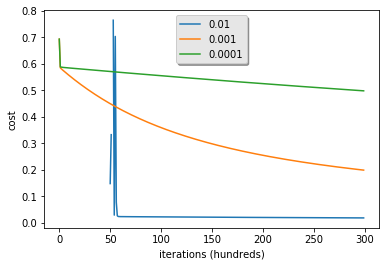

In [60]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, Y_train, X_test, Y_test, num_iterations = 30000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [61]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 30000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan


C:\Users\malli\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\malli\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


Cost after iteration 1800: nan
Cost after iteration 1900: nan
Cost after iteration 2000: nan
Cost after iteration 2100: nan
Cost after iteration 2200: nan
Cost after iteration 2300: nan
Cost after iteration 2400: nan
Cost after iteration 2500: nan
Cost after iteration 2600: nan
Cost after iteration 2700: nan
Cost after iteration 2800: nan
Cost after iteration 2900: nan
Cost after iteration 3000: nan
Cost after iteration 3100: nan
Cost after iteration 3200: nan
Cost after iteration 3300: nan
Cost after iteration 3400: nan
Cost after iteration 3500: nan
Cost after iteration 3600: nan
Cost after iteration 3700: nan
Cost after iteration 3800: nan
Cost after iteration 3900: nan
Cost after iteration 4000: nan
Cost after iteration 4100: nan
Cost after iteration 4200: nan
Cost after iteration 4300: nan
Cost after iteration 4400: nan
Cost after iteration 4500: nan
Cost after iteration 4600: nan
Cost after iteration 4700: nan
Cost after iteration 4800: nan
Cost after iteration 4900: nan
Cost aft

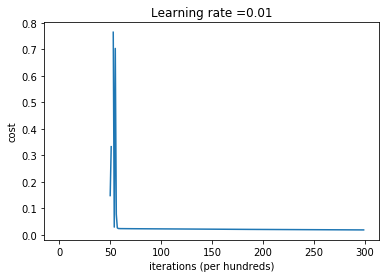

In [62]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [63]:
print('Enter your marks (phy, chem, math)')
A = arr = [round(float(i),2) for i in input().split()]
A = np.array(A)
A = A.reshape((-1,1))

Enter your marks (phy, chem, math)


 80 70 40


In [64]:
prob = sigmoid((d['w'].T @ A) + d['b'])
print('Your probability of getting accepted into the college is:  ' + str(prob * 100))

Your probability of getting accepted into the college is:  [[78.30440535]]
